In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import  Pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import time

In [2]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
print('data shape = ',x.shape)
print('num of benign = ',y[y==0].shape[0])
print('num of malignant = ',y[y==1].shape[0])

data shape =  (569, 30)
num of benign =  212
num of malignant =  357


In [3]:
def polynomial_model(degree = 1, **kwarg):
    polynolial_features = PolynomialFeatures(degree=degree,include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([['pf',polynolial_features],['lr',logistic_regression]])
    return pipeline

In [4]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2)
print('x_train.shape = ',x_train.shape,' , x_test.shape = ',x_test.shape)

#original regression
start = time.clock()
model = LogisticRegression()
model.fit(x_train, y_train)

train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)
print('\n')
print('train_score = ', train_score)
print('test_score = ', test_score)

y_pred = model.predict(x_test)
a = np.equal(y_pred,y_test)
pred_correct = a[a==True].shape[0]
print('time = ',time.clock()-start)
print('match rate = {0}/{1}'.format(pred_correct,y_test.shape[0]))

#using the polynomial feature
start = time.clock()
model2 = polynomial_model(degree=3,penalty='l1')
model2.fit(x_train,y_train)

train_score2 = model2.score(x_train,y_train)
test_score2 = model2.score(x_test,y_test)
print('\n')
print('train_score2 = ', train_score2)
print('test_score2 = ', test_score2)

y_pred2 = model2.predict(x_test)
a2 = np.equal(y_pred2,y_test)
pred_correct2 = a2[a2==True].shape[0]
print('time = ',time.clock()-start)
print('match rate = {0}/{1}'.format(pred_correct2,y_test.shape[0]))

lg = model2.named_steps['lr']
print('\n')
print('lg.coef_.shape = ',lg.coef_.shape)
print('np.count_nonzero(lg.coef_) = ',np.count_nonzero(lg.coef_))

x_train.shape =  (455, 30)  , x_test.shape =  (114, 30)


train_score =  0.9560439560439561
test_score =  0.956140350877193
time =  0.13046126457755183
match rate = 109/114


train_score2 =  1.0
test_score2 =  0.9736842105263158
time =  0.4089621891914955
match rate = 111/114


lg.coef_.shape =  (1, 5455)
np.count_nonzero(lg.coef_) =  1204


# draw the learning curve

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [6]:
def plot_learning_curve(estimator,title,x,y,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1,1.0,5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("training examples")
    plt.ylabel("score")
    train_sizes,train_scores,test_scores = learning_curve(
        estimator,x,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean =np.mean(test_scores,axis=1)
    test_scores_std =np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label="training score")
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label="cross validation score")
    plt.legend(loc="best")
    
    

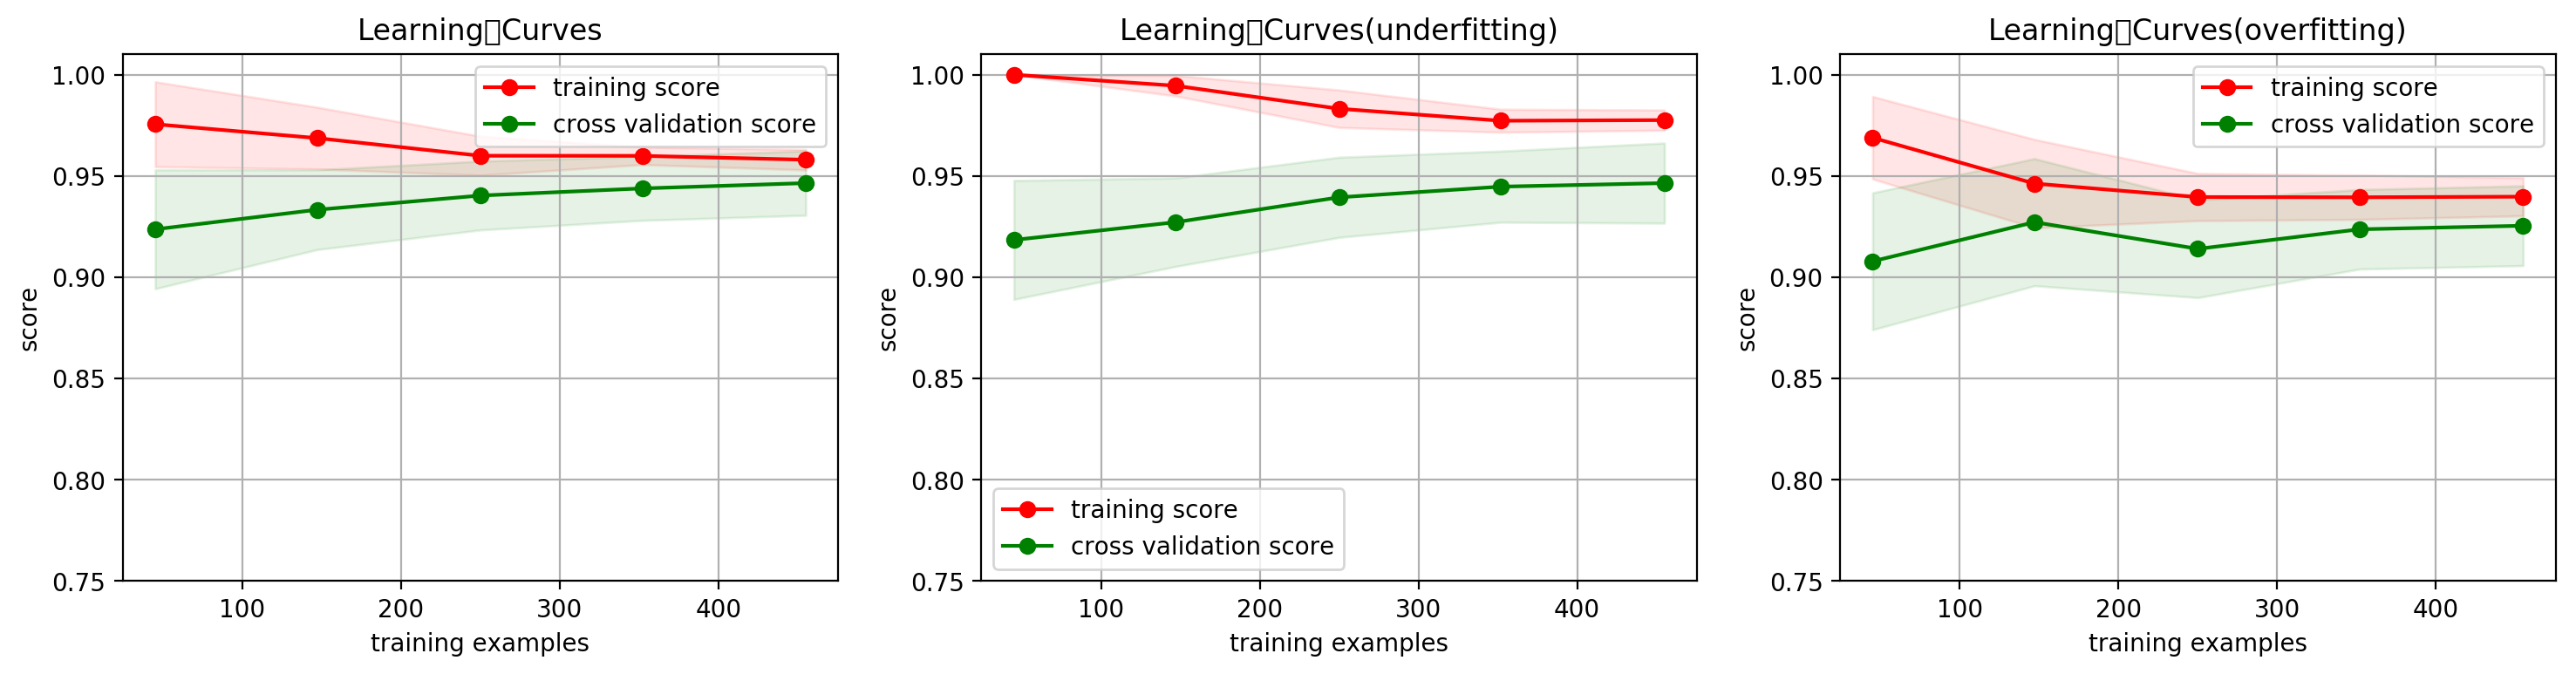

In [102]:
cv =ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
titles=['Learning　Curves','Learning　Curves(underfitting)','Learning　Curves(overfitting)']
degrees = [1,2,5]

plt.figure(figsize=(18,4),dpi=200)
for i in range(len(degrees)):
    plt.subplot(1,3,i+1)
    plot_learning_curve(polynomial_model(degrees[i]),titles[i],x,y,ylim=(0.75,1.01),cv=cv)
plt.show()